# GPHS441 example 1: Auckland to Wellington
Use the flight from Auckland to Wellington to illustrate use of python with position vectors, rotations, etc.

Start by importing numpy, pyplot, and our pre-defined module of functions; then define locations in both [longitude,latitude] and as position vectors $\mathbf{p}_1$ and $\mathbf{p}_2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPHS441_plates as gp

%matplotlib notebook

lonlatAuckland = [174.7850,-37.0082]
lonlatWellington = [174.8076,-41.3276]

pAuckland = gp.positionVector(lonlatAuckland)
pWellington = gp.positionVector(lonlatWellington)

print('Auckland =',pAuckland,'; Wellington =',pWellington)

Auckland = [-0.79524389  0.07258279 -0.60192932] ; Wellington = [-0.74786454  0.06796098 -0.66036348]


## Mean location, distance, pole to great circle
We use vector algebra on the two position vectors $\mathbf{p}_1$ and $\mathbf{p}_2$.

The mean location is the projected position of the sum of the vectors.
\begin{equation}
\mathbf{m} = \frac{\mathbf{p}_1 + \mathbf{p}_2}{\|{\mathbf{p}_1 + \mathbf{p}_2}\|} 
\end{equation}

The angular distance $\theta$ can be determined from the dot product.
\begin{equation}
\mathbf{p}_1 \cdot \mathbf{p}_2 = \|\mathbf{p}_1\| \|\mathbf{p}_2\| cos\theta = cos\theta
\end{equation}

The pole $\mathbf{n}$ to the great circle connecting the points is found from the cross product
\begin{equation}
\mathbf{p}_1 \times \mathbf{p}_2 = \|\mathbf{p}_1\| \|\mathbf{p}_2\| sin\theta \mathbf{n} = sin\theta \mathbf{n}
\end{equation}

Note that if $\theta$ is small then $\theta \approx sin\theta$, and so $\mathbf{p}_1 \times \mathbf{p}_2$ approximates the rotation parameter vector $\mathbf{h}$.


In [2]:
midpoint = (pAuckland + pWellington) / gp.length(pAuckland + pWellington)
lonlatMidpoint = gp.lonlat(midpoint)
print('Midpoint at ', lonlatMidpoint)

angle = np.arccos(np.dot(pAuckland,pWellington))
print('Distance = ',np.degrees(angle),'degrees = ',angle*gp.rEarth,'km')

pole = np.cross(pAuckland,pWellington) / np.sin(angle)
ll = gp.lonlat(pole)
print('Pole to great circle: position vector = ',pole,'; [lon,lat] = [{0:3.3f},{1:2.3f}]'.format(ll[0],ll[1]))

h = angle * pole
rotationMatrix = gp.rotationMatrix(h)
rotatedAuckland = np.dot(rotationMatrix,pAuckland)
print('pWellington = ',pWellington,'; rotatedAuckland = ',rotatedAuckland)


Midpoint at  [174.79595284 -39.16790055]
Distance =  4.319435488175318 degrees =  480.2993122535583 km
Pole to great circle: position vector =  [-0.09325006 -0.99563777  0.00314053] ; [lon,lat] = [264.649,0.180]
pWellington =  [-0.74786454  0.06796098 -0.66036348] ; rotatedAuckland =  [-0.74786454  0.06796098 -0.66036348]


## Plot results
Setup a blank map of NZ: The `ax` object is a subplot of `fig` and used to plot data points.  
Rotations are used to construct great circle and small circle paths. 
Note the use of `for` loops, lists, and arrays.

<IPython.core.display.Javascript object>


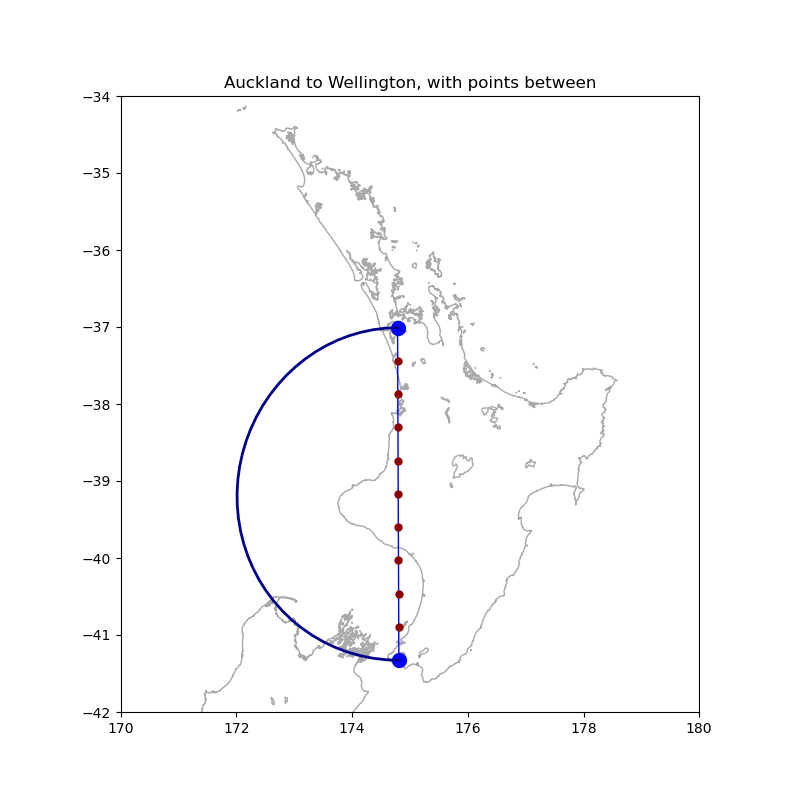

proportion domain = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
pathArray 
 [[174.785      174.57286761 174.36199431 174.15357209 173.94878267
  173.74879241 173.55474724 173.36776756 173.18894309 173.01932764
  172.85993387 172.71172797 172.57562434 172.45248019 172.3430901
  172.2481807  172.1684052  172.10433814 172.05647018 172.02520303
  172.01084463 172.01360467 172.03359037 172.07080278 172.1251337
  172.19636309 172.28415739 172.38806859 172.50753426 172.64187867
  172.790315   172.95194867 173.12578196 173.31071987 173.50557717
  173.7090867  173.91990876 174.13664157 174.35783269 174.5819911
  174.8076    ]
 [-37.0082     -37.01532884 -37.03534243 -37.0681275  -37.11349832
  -37.17119754 -37.24089727 -37.32220052 -37.414643   -37.51769512
  -37.63076444 -37.75319834 -37.88428708 -38.02326714 -38.16932487
  -38.32160049 -38.47919243 -38.6411619  -38.80653785 -38.97432219
  -39.14349535 -39.31302201 -39.48185726 -39.6489528  -39.81326354
  -39.97375422 -40.12940627 -40.2792247  -40.4

In [3]:
fig,ax = gp.mapSetup([170,180,-42,-34],"Auckland to Wellington, with points between")

# plot Auckland, Wellington, with line between
ax.plot([lonlatAuckland[0], lonlatWellington[0]], [lonlatAuckland[1], lonlatWellington[1]],
         color='blue', linewidth=1, marker='o', markersize=10)

# Use rotation to plot 0.1,0.2...0.9 of trip along great circle path (9 points).
print('proportion domain =', np.linspace(0.1,0.9,9))
for proportion in np.linspace(0.1,0.9,9):
    rotationMatrix = gp.rotationMatrix(proportion * h)
    rotatedAuckland = np.dot(rotationMatrix,pAuckland) 
    ax.plot(gp.lonlat(rotatedAuckland)[0], gp.lonlat(rotatedAuckland)[1],
            color='darkred', markersize=5, marker='o')

# Now consider a semi-circular (small circle) path with lots of points around the midpoint
# Rotation parameters: 180 degrees is pi radians, and the path is around the midpoint
hNew = np.pi * midpoint 
# Use a list [] to store each point along the path. Auckland is the start point
path = list()
path.append(lonlatAuckland)
# We could also instantiate the list in one line with: path = [lonlatAuckland]
n = 40
for i in range(1,n+1):
    rotationMatrix = gp.rotationMatrix(i/n * hNew)
    rotatedPositionVector = np.dot(rotationMatrix,pAuckland)
    path.append(gp.lonlat(rotatedPositionVector))

# Convert the path list to an array and transpose, to give better shape for plotting
pathArray = np.transpose(np.asarray(path)) # could also have used = np.asarray(path).T
print('pathArray \n',pathArray)
    
ax.plot(pathArray[0],pathArray[1], color='darkblue', linewidth=2)

plt.show()
